In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from numpy.random import randint
from multiprocessing import cpu_count
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:


import pandas as pd

# Read the CSV file into a DataFrame
file_path = '/Users/riannaaalto/C:/Users/riannaaalto/Desktop/Agile Project/HDMA_20000.csv'  
df = pd.read_csv(file_path)

# Get the number of rows and columns
num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')


Number of rows: 20000
Number of columns: 99


/var/folders/lf/t52rwnys6mbcn61_tmnwh0zc0000gn/T/ipykernel_2341/556764141.py:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


### Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 99 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   activity_year                             20000 non-null  int64  
 1   lei                                       20000 non-null  object 
 2   derived_msa_md                            5164 non-null   float64
 3   state_code                                19992 non-null  object 
 4   county_code                               19986 non-null  float64
 5   census_tract                              19986 non-null  float64
 6   conforming_loan_limit                     19996 non-null  object 
 7   derived_loan_product_type                 20000 non-null  object 
 8   derived_dwelling_category                 20000 non-null  object 
 9   derived_ethnicity                         20000 non-null  object 
 10  derived_race                      

In [6]:
df.head()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2019,549300FNXYY540N23N64,NaN,CT,9003.0,9.003416e+09,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,3286,21.58,98400,99.73,1077,1294,59
1,2019,549300FNXYY540N23N64,NaN,PA,42017.0,4.201710e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,3765,4.70,110100,84.24,1116,1295,54
2,2019,549300FNXYY540N23N64,NaN,NJ,34039.0,3.403903e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,3932,75.43,98600,83.56,1138,1395,60
3,2019,549300FNXYY540N23N64,NaN,PA,42055.0,4.205501e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,5844,10.40,76400,116.35,1769,2259,36
4,2019,549300FNXYY540N23N64,NaN,MT,30111.0,3.011100e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,7934,15.15,73700,113.72,2108,2879,28


### Checking the statistics of the dataset

In [7]:
df.describe()

,activity_year,derived_msa_md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,20000.0,5164.000000,19986.000000,1.998600e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,224.000000,26.000000,0.0,20000.00000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2019.0,38300.745546,26151.873461,2.615211e+10,2.547550,4.476350,1.985600,1.444300,20.861800,1.021800,...,4.870536,4.769231,NaN,5737.50920,33.766662,79975.51000,112.471981,1471.599350,2010.447800,35.235150
std,0.0,23523.664614,16600.615827,1.660063e+10,1.785077,14.718365,0.119136,0.711353,14.492253,0.146034,...,2.740860,2.888705,NaN,3071.73079,26.171262,17876.05247,39.439024,890.268267,1115.544952,17.628919
min,2019.0,0.000000,1001.000000,1.001020e+09,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,NaN,-31881.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2019.0,23104.000000,9009.000000,9.009166e+09,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,3.000000,2.250000,NaN,3938.00000,12.710000,68300.00000,86.410000,940.000000,1344.000000,22.000000
50%,2019.0,36260.000000,25023.000000,2.502351e+10,1.000000,1.000000,2.000000,1.000000,31.000000,1.000000,...,4.000000,5.000000,NaN,5213.00000,26.200000,77100.00000,107.885000,1338.000000,1815.500000,33.000000
75%,2019.0,41620.000000,41047.000000,4.104700e+10,4.000000,2.000000,2.000000,2.000000,32.000000,1.000000,...,7.000000,6.000000,NaN,6819.50000,48.952500,87900.00000,133.020000,1805.000000,2411.000000,47.000000
max,2019.0,99999.000000,56045.000000,5.604595e+10,8.000000,72.000000,2.000000,4.000000,32.000000,2.000000,...,9.000000,9.000000,NaN,31493.00000,100.000000,151000.00000,398.700000,19529.000000,25391.000000,76.000000


Calculate the number of missing (null) values in each column of a DataFrame 

In [9]:
df.isnull()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
19996,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
19997,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
19998,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False


In [13]:
# Get a list of all instances (rows)
all_instances = df.values.tolist()

# Print the first few instances as an example
for i, instance in enumerate(all_instances[:5]):  # Print the first 5 instances as an example
    print(f"Instance {i+1}:")
    print(instance)
    print()

Instance 1:
[2019, '549300FNXYY540N23N64', nan, 'CT', 9003.0, 9003416400.0, 'C', 'FHA:First Lien', 'Single Family (1-4 Units):Site-Built', 'Not Hispanic or Latino', 'Black or African American', 'Male', 3, 0, 2, 2, 1, 1, 2, 2, 2, 115000, 98.188, nan, nan, 3, nan, nan, nan, nan, nan, 360.0, nan, nan, 2, 2, 2, 2, 115000.0, 1, 1, 3, 5, '1', nan, 52.0, '50%-60%', 9, 10, 2.0, nan, nan, nan, nan, 5.0, nan, nan, nan, nan, 2, 4, 3.0, nan, nan, nan, nan, 8.0, nan, nan, nan, nan, 2, 4, 1, 5, 2, 4, '35-44', '9999', 'No', nan, 2, 1, 1, nan, nan, nan, nan, 4, nan, nan, nan, 3286, 21.58, 98400, 99.73, 1077, 1294, 59]

Instance 2:
[2019, '549300FNXYY540N23N64', nan, 'PA', 42017.0, 42017102401.0, 'C', 'Conventional:First Lien', 'Single Family (1-4 Units):Site-Built', 'Not Hispanic or Latino', 'Race Not Available', 'Joint', 2, 0, 2, 1, 32, 1, 2, 2, 2, 345000, 79.254, 3.5, 0.506, 3, nan, nan, nan, nan, nan, 180.0, nan, nan, 2, 2, 2, 2, 425000.0, 1, 1, 3, 5, '1', nan, 300.0, '30%-<36%', 1, 1, 2.0, nan, na

### Getting uniques values

In [12]:
# Dictionary to store unique values for each non-numeric column
unique_values = {}

# Iterate through non-numeric columns and find unique values
for column in non_numeric_columns:
    unique_values[column] = df[column].unique()

# Print the unique values for each non-numeric column
for column, values in unique_values.items():
    print(f"Unique values for '{column}':")
    print(values)
    print()

Unique values for 'lei':
['549300FNXYY540N23N64' 'KB1H1DSPRFMYMCUFXT09' '549300FGXN1K3HLB1R50'
 '5493008NWHQT1R22C024' '54930048P8RWCQHQM310' '549300WTZMQSET2VY242'
 '5493003IRCQIQ6T3QS04']

Unique values for 'state_code':
['CT' 'PA' 'NJ' 'MT' 'CA' 'LA' 'NV' 'FL' 'GA' 'NC' 'WI' 'SC' 'DE' 'RI'
 'MO' 'MN' 'AZ' 'NY' 'TX' 'IL' 'WA' 'VA' 'OH' 'MI' 'TN' 'CO' 'MD' 'IN'
 'MA' 'WV' 'AL' 'NH' 'KY' 'UT' 'OK' 'OR' 'IA' 'ID' 'KS' 'ND' 'NE' 'MS'
 'AR' 'DC' 'ME' 'VT' 'HI' 'NM' 'WY' 'SD' 'AK' nan]

Unique values for 'census_tract':
[9003416400.0 42017102401.0 34039034300.0 ... 4013723304.0 6067004601.0
 1117030319.0]

Unique values for 'conforming_loan_limit':
['C' 'NC' nan 'U']

Unique values for 'derived_loan_product_type':
['FHA:First Lien' 'Conventional:First Lien' 'VA:First Lien'
 'Conventional:Subordinate Lien' 'FSA/RHS:First Lien'
 'FHA:Subordinate Lien' 'VA:Subordinate Lien']

Unique values for 'derived_dwelling_category':
['Single Family (1-4 Units):Site-Built'
 'Single Family (1-4 Units):Man

In [13]:
pd.set_option('display.max_rows', 30)
def info(table):
    print(f'\n the shape of the table is : \n',table.shape)
    print('-' * 80)
    print('\n data types : ', table.dtypes.value_counts().sort_values())
    print('-' * 80)
    missings=table.isna().mean()[table.isna().mean().sort_values(ascending=False)!=0].sort_values(ascending=False)
    print('-' * 80)
    print('\n number of features having missing data : ',len(missings))
    print('-' * 80)
    print('\n missing data in the table: \n',missings)
    print('-' * 80)
    print(missings[missings>0.5])
    print('-' * 80)
    print('\n missing data over 30% : ',len(missings[missings>0.5]))
info(df)  


 the shape of the table is : 
 (20000, 99)
--------------------------------------------------------------------------------

 data types :  object     27
float64    32
int64      40
Name: count, dtype: int64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

 number of features having missing data :  48
--------------------------------------------------------------------------------

 missing data in the table: 
 applicant_ethnicity_5       1.00000
applicant_ethnicity_4       1.00000
aus_4                       1.00000
co_applicant_race_5         1.00000
co_applicant_race_4         1.00000
                             ...   
state_code                  0.00040
applicant_ethnicity_1       0.00030
conforming_loan_limit       0.00020
co_applicant_ethnicity_1    0.00010
applicant_race_1            0.00005
Length: 48, dtype: float64
-----------------------------------------------

The data we are working with contains 20000 observations and 99 columns only 27 of them are categorical and the rest are numeric.
There are missing data with 48 columns contains missing informations with 31% instances that exceed threshold of 30% of missing.

In [ ]:
In the Home Mortgage Disclosure Act (HMDA) dataset, the TARGET feature, also known as the dependent variable, is typically the "action_taken" column. This column represents the action taken by the lender in response to a mortgage loan application.
The "action_taken" column appears to be a categorical variable with integer values. The specific values in this column can vary, but it often represents outcomes such as:

Description: The action taken on the covered loan or application.

Values:
1 - Loan originated
2 - Application approved but not accepted
3 - Application denied
4 - Application withdrawn by applicant
5 - File closed for incompleteness
6 - Purchased loan
7 - Preapproval request denied
8 - Preapproval request approved but not accepted

In [12]:
# Print unique values and counts for action_taken

print(df['action_taken'].value_counts())

action_taken
1    10256
4     4184
3     2192
6     2145
5      687
2      535
8        1
Name: count, dtype: int64


We want to predict whether a person will receive a loan or not in which is a binary classification problem. The target variable should be a binary variable indicating loan approval status. In HDMA dataset, it seems that  "action_taken"  is a potential target variable because it is related to the outcome of the loan application.

### Examine the Target:

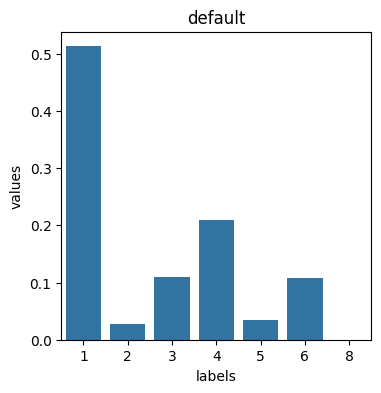

In [20]:

import seaborn as sns
import matplotlib.pyplot as plt


temp = df.action_taken.value_counts()
df1 = pd.DataFrame({'labels': temp.index, 'values': temp.values/len(df)})

plt.figure(figsize=(4, 4))
plt.title('default')
sns.set_color_codes("pastel")
sns.barplot(x='labels', y="values", data=df1)
locs, labels = plt.xticks()
plt.show()


In [12]:
# Create a binary target variable
df['loan_approval'] = df['action_taken'].apply(lambda x: 1 if x in (1, 2) else 0)


convert the "action_taken" variable into a binary format. This simplifies the task to predict whether a loan application will be approved (positive class) or denied (negative class). 

Approved: Map values 1 and 2 to 1 (indicating approval).
Denied: Map values 3, 4, 5, 7, and 8 to 0 (indicating denial).

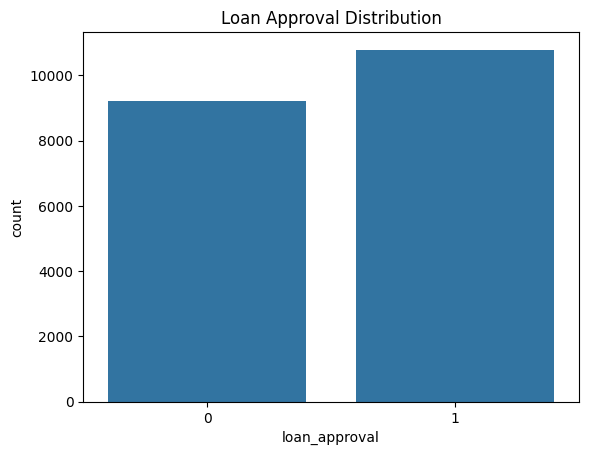

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explore the target variable distribution
sns.countplot(data=df, x='loan_approval')
plt.title("Loan Approval Distribution")
plt.show()


 Identify Related Variables: To identify related variables, we compute correlations between the target variable and other features.

### Calculate Correlation 

In [22]:
#Calculate the Chi-squared of categorical features:
import scipy.stats as stats

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col != 'loan_approval':
        crosstab = pd.crosstab(df['loan_approval'], df[col])
        chi2, p, _, _ = stats.chi2_contingency(crosstab)
        print(f"{col} Chi-squared: {chi2}, p-value: {p}")



lei Chi-squared: 3553.0912346129207, p-value: 0.0
state_code Chi-squared: 351.2248792149998, p-value: 7.455580553687252e-47
conforming_loan_limit Chi-squared: 4.150644370439007, p-value: 0.1255159815839322
derived_loan_product_type Chi-squared: 147.77093967631342, p-value: 2.289763962941702e-29
derived_dwelling_category Chi-squared: 31.228638082537767, p-value: 1.6549596199166e-07
derived_ethnicity Chi-squared: 43.108342172796405, p-value: 9.825831350120257e-09
derived_race Chi-squared: 83.7010204810283, p-value: 8.769828282060561e-15
derived_sex Chi-squared: 85.78796232038667, p-value: 1.7579667132368168e-18
combined_loan_to_value_ratio Chi-squared: 6972.587003994648, p-value: 1.561856533621677e-08
interest_rate Chi-squared: 1853.184181140819, p-value: 2.6571832184606146e-277
rate_spread Chi-squared: 1873.3559317324723, p-value: 1.0
total_loan_costs Chi-squared: 11376.337415898905, p-value: 0.00325118866936947
total_points_and_fees Chi-squared: 0.0, p-value: 1.0
origination_charges Ch

Features with p-values close to zero are highly significant, indicating strong associations. Features with p-values greater than 0.05 are considered less significant or not significant, suggesting weaker or no associations.

Based on the chi-squared test results and p-values, here are the relevant categorical features for the analysis of credit prediction, along with their relevance:

state_code:
Relevance: State code can be relevant because lending practices and regulations can vary by 
state, impacting credit decisions.

conforming_loan_limit:
Relevance: The conforming loan limit can be relevant as it affects the type of loans that borrowers can access, which can influence creditworthiness.

derived_loan_product_type:
Relevance: The type of loan product chosen by borrowers may influence credit risk.

derived_dwelling_category:
Relevance: The type of dwelling (e.g., single-family, multi-family) can impact credit assessments.

derived_ethnicity:
Relevance: Borrower ethnicity can be relevant for understanding lending disparities and credit outcomes.

derived_race:
Relevance: Borrower race can be relevant for assessing lending fairness and potential disparities in credit decisions.

derived_sex:
Relevance: Borrower gender can be a relevant factor for credit prediction, as it may influence loan terms and approval.

combined_loan_to_value_ratio:
Relevance: This ratio can provide insights into the financial health of borrowers, impacting their 
creditworthiness.

rate_spread:
Relevance: The rate spread can be relevant in assessing differences in loan terms, which can be associated with credit outcomes.

loan_term:
Relevance: The loan term can be relevant as it impacts the repayment schedule and credit risk.

intro_rate_period:
Relevance: The introductory rate period can affect the initial affordability and potential credit risk.

property_value:
Relevance: Property value is relevant for credit assessment, as it's often used as collateral for loans.

total_units:
Relevance: The number of units in a property may impact the type of loan and credit risk.

debt_to_income_ratio:
Relevance: The debt-to-income ratio is a key factor in assessing a borrower's creditworthiness.

applicant_age and co_applicant_age:
Relevance: The ages of applicants and co-applicants can be relevant for credit assessment, as age can impact financial stability and repayment capacity.

applicant_age_above_62 and co_applicant_age_above_62:
Relevance: Identifying whether applicants or co-applicants are above the age of 62 can be relevant for assessing credit risk, as it may impact retirement income and other factors.
These categorical features provide valuable information that can help in predicting credit outcomes and assessing credit risk for mortgage applications.

calculate correlation coefficients using methods such as Pearson correlation (for linear relationships) or Spearman correlation (for monotonic relationships). 

In [26]:
import pandas as pd


non_categorical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate Pearson correlation (linear relationship)
pearson_correlations = df[non_categorical_columns].corr()

# Calculate Spearman correlation (monotonic relationship)
spearman_correlations = df[non_categorical_columns].corr(method='spearman')

# Print the results
print("Pearson Correlations:")
print(pearson_correlations)

print("\nSpearman Correlations:")
print(spearman_correlations)


Pearson Correlations:
                                   activity_year  derived_msa_md  county_code  \
activity_year                                NaN             NaN          NaN   
derived_msa_md                               NaN        1.000000     0.108944   
county_code                                  NaN        0.108944     1.000000   
census_tract                                 NaN        0.108951     1.000000   
action_taken                                 NaN       -0.030540     0.011917   
...                                          ...             ...          ...   
tract_to_msa_income_percentage               NaN       -0.021425    -0.018808   
tract_owner_occupied_units                   NaN       -0.125173     0.027953   
tract_one_to_four_family_homes               NaN       -0.020603    -0.008037   
tract_median_age_of_housing_units            NaN        0.035126     0.049074   
loan_approval                                NaN        0.017302    -0.011914   

     

In [25]:
NUMERIC_FEATURES = df.select_dtypes(['int64','float64']).columns
df[NUMERIC_FEATURES].describe()

,activity_year,derived_msa_md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,...,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,loan_approval
count,20000.0,5164.000000,19986.000000,1.998600e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,26.000000,0.0,20000.00000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2019.0,38300.745546,26151.873461,2.615211e+10,2.547550,4.476350,1.985600,1.444300,20.861800,1.021800,...,4.769231,NaN,5737.50920,33.766662,79975.51000,112.471981,1471.599350,2010.447800,35.235150,0.539550
std,0.0,23523.664614,16600.615827,1.660063e+10,1.785077,14.718365,0.119136,0.711353,14.492253,0.146034,...,2.888705,NaN,3071.73079,26.171262,17876.05247,39.439024,890.268267,1115.544952,17.628919,0.498446
min,2019.0,0.000000,1001.000000,1.001020e+09,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,NaN,-31881.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.0,23104.000000,9009.000000,9.009166e+09,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,2.250000,NaN,3938.00000,12.710000,68300.00000,86.410000,940.000000,1344.000000,22.000000,0.000000
50%,2019.0,36260.000000,25023.000000,2.502351e+10,1.000000,1.000000,2.000000,1.000000,31.000000,1.000000,...,5.000000,NaN,5213.00000,26.200000,77100.00000,107.885000,1338.000000,1815.500000,33.000000,1.000000
75%,2019.0,41620.000000,41047.000000,4.104700e+10,4.000000,2.000000,2.000000,2.000000,32.000000,1.000000,...,6.000000,NaN,6819.50000,48.952500,87900.00000,133.020000,1805.000000,2411.000000,47.000000,1.000000
max,2019.0,99999.000000,56045.000000,5.604595e+10,8.000000,72.000000,2.000000,4.000000,32.000000,2.000000,...,9.000000,NaN,31493.00000,100.000000,151000.00000,398.700000,19529.000000,25391.000000,76.000000,1.000000


hypothesis and questions:
    
* does a large amount of credit leads to denied?
* does the number of children have an impact on the credit denied ?
* Does age of the applicant have a negative impact to loan approval ?
* Does the high price of the property for which the loan is requested causes the default to pay?
* Is the limited amount of income the principle factor of denial ?

In [31]:
def plot_distribution(df, FEATURES):
    i = 0
    t1 = df.loc[df['loan_approval'] != 0]
    t0 = df.loc[df['loan_approval'] == 0]

    sns.set_style('whitegrid')
    fig, ax = plt.subplots(4, 2, figsize=(16, 20))

    for feature in FEATURES:
        if feature != 'loan_approval':
            i += 1
            plt.subplot(4, 2, i)
            
            if df[feature].dtype == 'object':  # Check if the feature is categorical
                sns.countplot(data=df, x=feature, hue='loan_approval')
            else:  # Assume it's a numeric feature
                sns.kdeplot(t1[feature], bw=0.5, color='red', label="loan_approval = 1")
                sns.kdeplot(t0[feature], bw=0.5, label="default = 0")

            plt.ylabel('Density plot' if df[feature].dtype != 'object' else 'Count plot', fontsize=12)
            plt.xlabel(feature, fontsize=12)
            plt.xticks(fontsize=12, rotation=90)
            plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

/var/folders/lf/t52rwnys6mbcn61_tmnwh0zc0000gn/T/ipykernel_28953/2569601383.py:17: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t1[feature], bw=0.5, color='red', label="loan_approval = 1")
/var/folders/lf/t52rwnys6mbcn61_tmnwh0zc0000gn/T/ipykernel_28953/2569601383.py:18: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t0[feature], bw=0.5, label="default = 0")
/var/folders/lf/t52rwnys6mbcn61_tmnwh0zc0000gn/T/ipykernel_28953/2569601383.py:17: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters

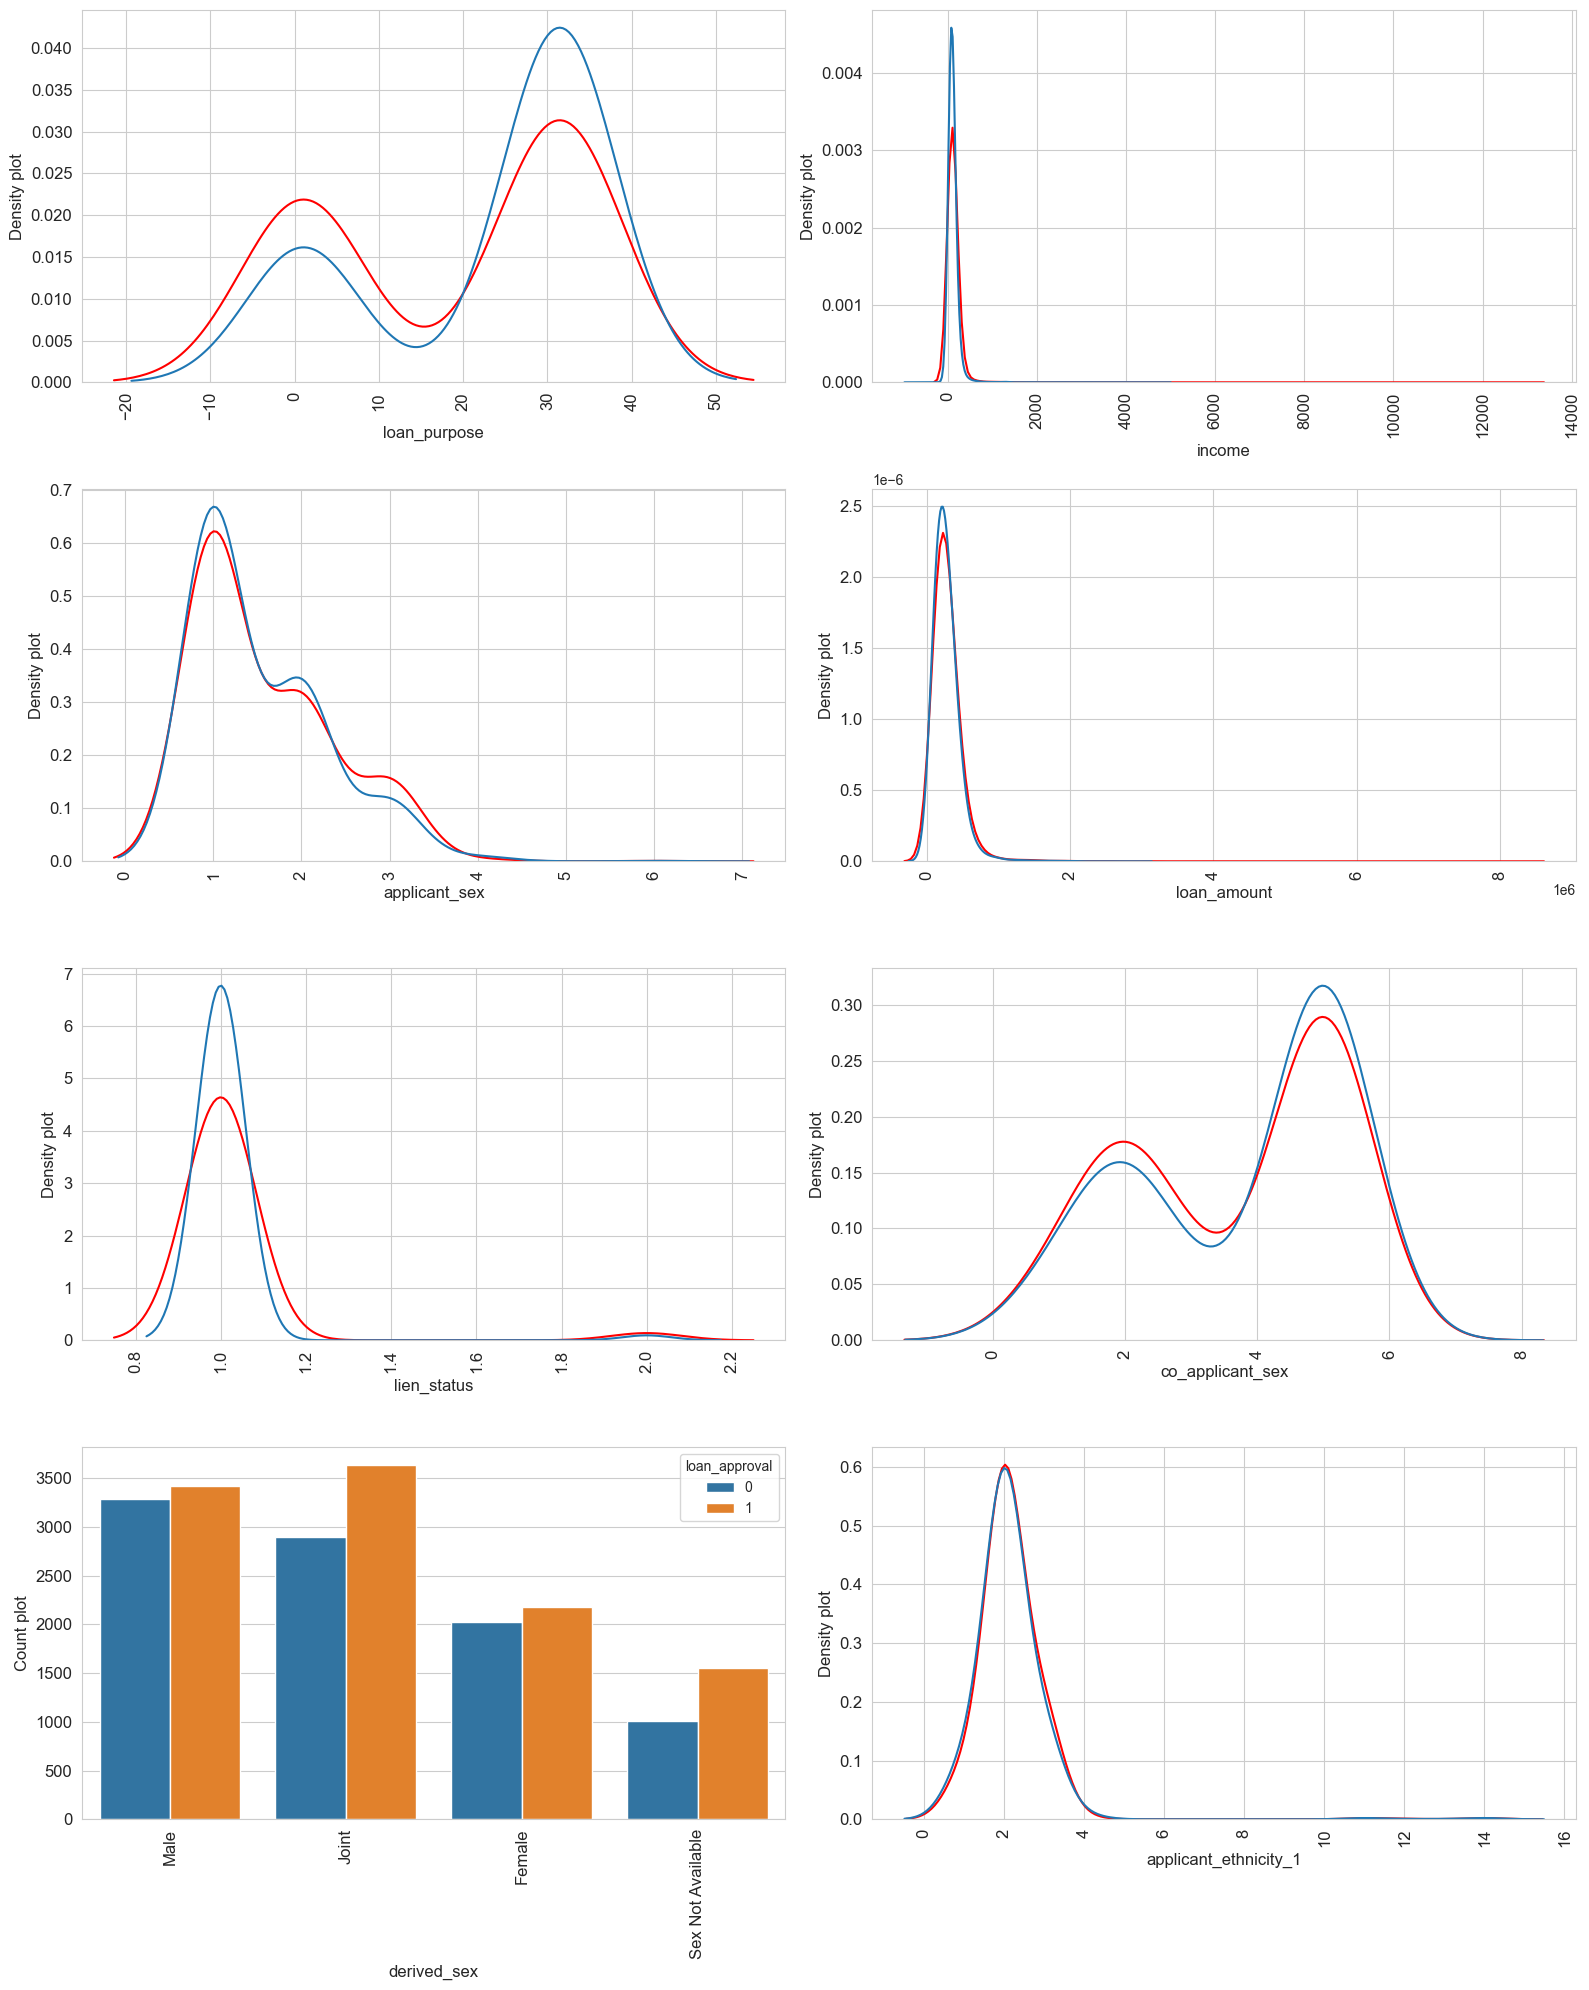

In [39]:
domain_features=['loan_purpose','income','applicant_sex','loan_amount','lien_status','aus_1'
                 'co_applicant_sex','derived_sex','applicant_ethnicity_1']

plot_distribution(df,domain_features)

The target == 1 curve skews towards the younger end of the range,younger peope are more likely to default.

In [6]:
# Drop rows with more than 30% missing values
threshold = len(df) * 0.30
df_processed = df.dropna(thresh=threshold, axis=1)


### Drop unrelevant features

In [1]:
#use the group's list  
relevant_features = ['census_tract', 
'action_taken',                      
'loan_type',                                   
'lien_status',                                 
'reverse_mortgage',                            
'open_end_line_of_credit',                    
'loan_amount',                                 
'combined_loan_to_value_ratio',               
'interest_rate',                              
'total_loan_costs',                           
'origination_charges',                        
'loan_term',                                  
'negative_amortization',                       
'interest_only_payment',                       
'balloon_payment',                            
'other_nonamortizing_features',               
'property_value',                             
'occupancy_type',                              
'manufactured_home_secured_property_type',     
'manufactured_home_land_property_interest',    
'total_units',                                
'income',                                    
'debt_to_income_ratio',                       
'applicant_credit_score_type',                 
'co_applicant_credit_score_type',              
'applicant_sex',                               
'co_applicant_sex',                            
'applicant_age',                              
'co_applicant_age',
'applicant_race_2',
'co_applicant_race_1',
'aus_1',                                       
'applicant_race_1',                          
'co_applicant_race_1',                       
'applicant_ethnicity_1',                     
'co_applicant_ethnicity_1']                  

In [4]:
df_processed = df[relevant_features]

In [48]:
# Create a binary target variable
df_processed['loan_approval'] = df_processed['action_taken'].apply(lambda x: 1 if x in (1, 2) else 0)


/var/folders/lf/t52rwnys6mbcn61_tmnwh0zc0000gn/T/ipykernel_30868/213785000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['loan_approval'] = df_processed['action_taken'].apply(lambda x: 1 if x in (1, 2) else 0)


In [49]:
import scipy.stats as stats

new_categorical_columns = df_processed.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col != 'loan_approval':
        crosstab = pd.crosstab(df_processed['loan_approval'], df_processed[col])
        chi2, p, _, _ = stats.chi2_contingency(crosstab)
        print(f"{col} Chi-squared: {chi2}, p-value: {p}")


combined_loan_to_value_ratio Chi-squared: 13441.254529263204, p-value: 0.0
interest_rate Chi-squared: 12027.004182904582, p-value: 0.0
total_loan_costs Chi-squared: 15064.643462001579, p-value: 3.3110677571276543e-136
origination_charges Chi-squared: 13838.838521207943, p-value: 0.0
loan_term Chi-squared: 1006.744038040538, p-value: 4.86083490783154e-163
property_value Chi-squared: 7399.328465619132, p-value: 0.0
total_units Chi-squared: 652.0779456488123, p-value: 1.474798553981754e-135
debt_to_income_ratio Chi-squared: 8401.046898758614, p-value: 0.0
applicant_age Chi-squared: 208.54580651796311, p-value: 1.7747717089175887e-41
co_applicant_age Chi-squared: 145.35327661705477, p-value: 1.8239683492075776e-27


combined_loan_to_value_ratio Chi-squared: 13441.25, p-value: 0.0
Significance: Very High

interest_rate Chi-squared: 12027.00, p-value: 0.0
Significance: Very High

total_loan_costs Chi-squared: 15064.64, p-value: 3.31e-136
Significance: Very High

origination_charges Chi-squared: 13838.84, p-value: 0.0
Significance: Very High

loan_term Chi-squared: 1006.74, p-value: 4.86e-163
Significance: Very High

property_value Chi-squared: 7399.33, p-value: 0.0
Significance: Very High

total_units Chi-squared: 652.08, p-value: 1.47e-135
Significance: Very High

debt_to_income_ratio Chi-squared: 8401.05, p-value: 0.0
Significance: Very High

applicant_age Chi-squared: 208.55, p-value: 1.77e-41
Significance: Very High

co_applicant_age Chi-squared: 145.35, p-value: 1.82e-27
Significance: Very High

In [5]:
import pandas as pd

# Specify the file path where you want to save the CSV file
file_path = "/Users/riannaaalto/Agile projekt/HDMA_test_train.csv"

# Save the DataFrame to a CSV file
df_processed.to_csv(file_path, index=False)

# 'index=False' is used to prevent saving the DataFrame index as a column in the CSV file.

print(f"DataFrame saved to {file_path}")


DataFrame saved to /Users/riannaaalto/Agile projekt/HDMA_test_train.csv


## Data preprocessing

In [50]:
pd.crosstab(df_processed['loan_approval'],df_processed['applicant_age'], margins=True)

applicant_age,25-34,35-44,45-54,55-64,65-74,8888,<25,>74,All
loan_approval,,,,,,,,,
0,1417,2035,2165,1736,1112,126,179,439,9209
1,2091,2706,2507,1897,967,54,259,310,10791
All,3508,4741,4672,3633,2079,180,438,749,20000


In [51]:
pd.crosstab(df_processed['loan_approval'],df_processed['income'], margins=True)

income,-782.0,-330.0,-120.0,-69.0,-46.0,-17.0,-7.0,-4.0,-2.0,0.0,...,3250.0,3376.0,3799.0,4565.0,4612.0,4800.0,5375.0,7817.0,13065.0,All
loan_approval,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,2,1,1,76,...,1,0,0,0,1,1,0,0,0,9209
1,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,0,0,1,1,1,10791
All,1,1,1,1,1,1,2,1,1,77,...,1,1,1,1,1,1,1,1,1,20000


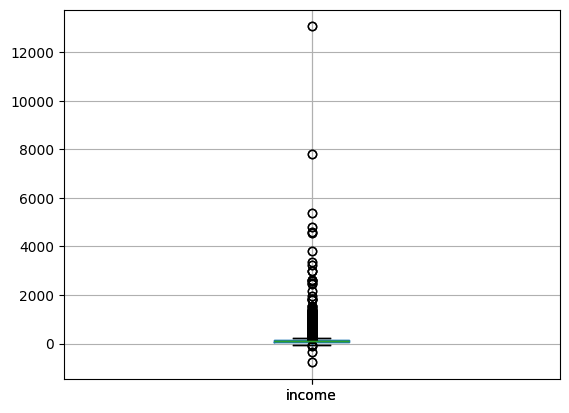

In [53]:
df.boxplot(column='income')
plt.show()

there are some outliers

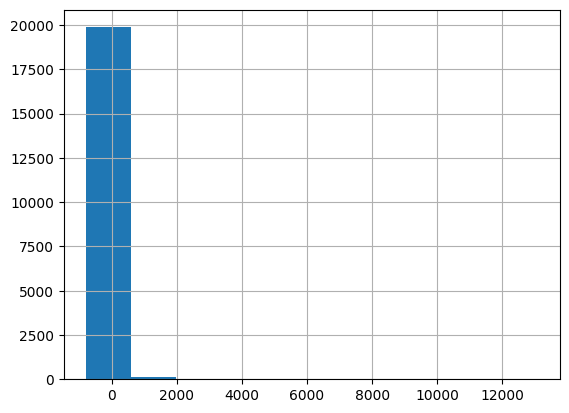

In [54]:
import matplotlib.pyplot as plt
df_processed['income'].hist(bins=10)
plt.show()  # Display the histogram

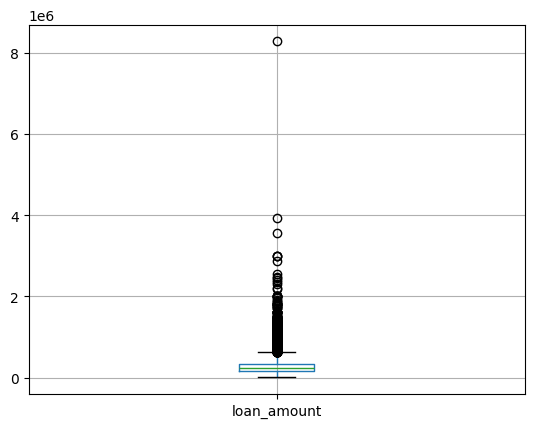

In [38]:
df_processed.boxplot(column='loan_amount')
plt.show()

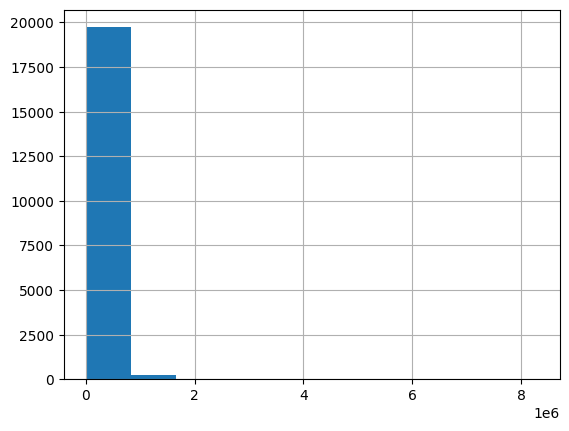

In [39]:
import matplotlib.pyplot as plt
df_processed['loan_amount'].hist(bins=10)
plt.show()  # Display the graph

In [ ]:
the histogram is screwed to the left, and needs to be normalized

/var/folders/lf/t52rwnys6mbcn61_tmnwh0zc0000gn/T/ipykernel_30868/3839530447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['Loan_amount_log'] = np.log(df_processed['loan_amount'])


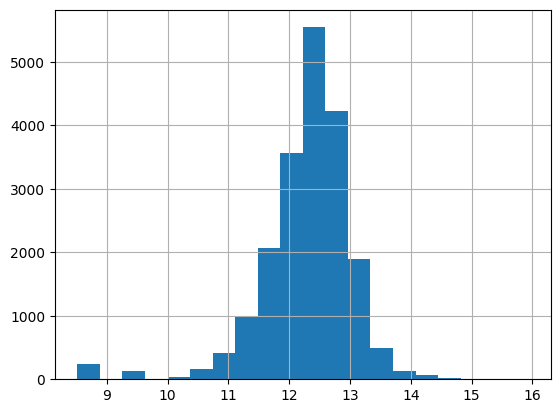

In [40]:
#to normalized the loan_amount
import numpy as np  # Import the NumPy library

df_processed['Loan_amount_log'] = np.log(df_processed['loan_amount'])
df_processed['Loan_amount_log'].hist(bins=20)
plt.show()


In [55]:
#look for the missing value of each variable
df_processed.isnull().sum()

census_tract                 0
action_taken                 0
loan_type                    0
lien_status                  0
reverse_mortgage             0
                            ..
applicant_ethnicity_1        0
co_applicant_ethnicity_1     0
income_log                  10
Loan_amount_log              0
loan_approval                0
Length: 37, dtype: int64

In [29]:
pd.set_option('display.max_rows', 30)
def info(table):
    print(f'\n the shape of the table is : \n',table.shape)
    print('-' * 80)
    print('\n data types : ', table.dtypes.value_counts().sort_values())
    print('-' * 80)
    missings=table.isna().mean()[table.isna().mean().sort_values(ascending=False)!=0].sort_values(ascending=False)
    print('-' * 80)
    print('\n number of features having missing data : ',len(missings))
    print('-' * 80)
    print('\n missing data in the table: \n',missings)
    print('-' * 80)
    print(missings[missings>0.5])
    print('-' * 80)
    print('\n missing data over 30% : ',len(missings[missings>0.5]))
info(df_processed)  


 the shape of the table is : 
 (20000, 34)
--------------------------------------------------------------------------------

 data types :  float64     5
object     10
int64      19
Name: count, dtype: int64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

 number of features having missing data :  12
--------------------------------------------------------------------------------

 missing data in the table: 
 total_loan_costs                0.41475
origination_charges             0.38620
combined_loan_to_value_ratio    0.38305
debt_to_income_ratio            0.36920
interest_rate                   0.35145
property_value                  0.25935
income                          0.08510
loan_term                       0.00950
census_tract                    0.00070
applicant_ethnicity_1           0.00030
co_applicant_ethnicity_1        0.00010
applicant_race_1              

### Processing the missing values

In [ ]:
census_tract, float64
combined_loan_to_value_ratio, object
interest_rate, object
total_loan_costs, object
origination_charges, object
property_value, object 
income, float64
debt_to_income_ratio, object
applicant_race_1,float64 
applicant_ethnicity_1, float
co_applicant_ethnicity_1, float

#### Using inplace function to replace missing value to categorical features

In [33]:
df_processed['combined_loan_to_value_ratio'].fillna(df_processed['combined_loan_to_value_ratio'].mode().iloc[0], inplace=True)
df_processed['interest_rate'].fillna(df_processed['interest_rate'].mode().iloc[0], inplace=True)
df_processed['total_loan_costs'].fillna(df_processed['total_loan_costs'].mode().iloc[0], inplace=True)
df_processed['origination_charges'].fillna(df_processed['origination_charges'].mode().iloc[0], inplace=True)
df_processed['property_value'].fillna(df_processed['property_value'].mode().iloc[0], inplace=True)
df_processed['debt_to_income_ratio'].fillna(df_processed['debt_to_income_ratio'].mode().iloc[0], inplace=True)
df_processed['applicant_race_1'].fillna(df_processed['applicant_race_1'].mode().iloc[0], inplace=True)
df_processed['applicant_ethnicity_1'].fillna(df_processed['applicant_ethnicity_1'].mode().iloc[0], inplace=True)
df_processed['co_applicant_ethnicity_1'].fillna(df_processed['co_applicant_ethnicity_1'].mode().iloc[0], inplace=True)


/var/folders/lf/t52rwnys6mbcn61_tmnwh0zc0000gn/T/ipykernel_30868/1984295174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['combined_loan_to_value_ratio'].fillna(df_processed['combined_loan_to_value_ratio'].mode().iloc[0], inplace=True)
/var/folders/lf/t52rwnys6mbcn61_tmnwh0zc0000gn/T/ipykernel_30868/1984295174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['interest_rate'].fillna(df_processed['interest_rate'].mode().iloc[0], inplace=True)
/var/folders/lf/t52rwnys6mbcn61_tmnwh0zc0000gn/T/ipykernel_30868/1984295174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [34]:
#filling in NA to numeric data
df_processed['census_tract'].fillna(df_processed['census_tract'].mean(), inplace=True)
df_processed['income'].fillna(df_processed['income'].mean(), inplace=True)


/var/folders/lf/t52rwnys6mbcn61_tmnwh0zc0000gn/T/ipykernel_30868/2627094441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['census_tract'].fillna(df_processed['census_tract'].mean(), inplace=True)
/var/folders/lf/t52rwnys6mbcn61_tmnwh0zc0000gn/T/ipykernel_30868/2627094441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['income'].fillna(df_processed['income'].mean(), inplace=True)


In [46]:
#check if there is still value of each variable
df_processed.isnull().sum()

census_tract                 0
action_taken                 0
loan_type                    0
lien_status                  0
reverse_mortgage             0
                            ..
co_applicant_race_1          0
applicant_ethnicity_1        0
co_applicant_ethnicity_1     0
income_log                  10
Loan_amount_log              0
Length: 36, dtype: int64

no longer missing values available in the processed dataset. :)

In [57]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = df_processed.drop(columns=['loan_approval'])  
y = df_processed['loan_approval']

# Split the data into training and testing (validation) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




In [79]:
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline #pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE #for feature selection
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import (f1_score,classification_report,
                             roc_auc_score,confusion_matrix,roc_curve,auc) # evaluation metrics
from sklearn.model_selection import KFold,RandomizedSearchCV ,cross_val_score,RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier

In [88]:
# Define class weights
class_weights = {0: 1, 1: 9}

simple_estimators = {'Logistic Regression':LogisticRegression(),
                     'Decision Tree':DecisionTreeClassifier()}

In [81]:

training_simple_models(simple_estimators)

In [95]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## mitigate the error I have below

# Check for infinite values and extremely large values
mask = np.isinf(X) | (X > 1e6) 
print(mask)

       census_tract  action_taken  loan_type  lien_status  reverse_mortgage  \
0              True         False      False        False             False   
1              True         False      False        False             False   
2              True         False      False        False             False   
3              True         False      False        False             False   
4              True         False      False        False             False   
...             ...           ...        ...          ...               ...   
19995          True         False      False        False             False   
19996          True         False      False        False             False   
19997          True         False      False        False             False   
19998          True         False      False        False             False   
19999          True         False      False        False             False   

       open_end_line_of_credit  loan_amount  combin

In [96]:
# Create a mask to exclude the 'census_tract' column
exclude_census_tract = X.columns != 'census_tract'

# Apply the mask to X to exclude the 'census_tract' feature
X = X.loc[:, exclude_census_tract]


In [97]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split your data into X and y
X = df_processed.drop(columns='loan_approval')
y = df_processed['loan_approval']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/Users/riannaaalto/opt/anaconda3/envs/FaceD_1/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/riannaaalto/opt/anaconda3/envs/FaceD_1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/riannaaalto/opt/anaconda3/envs/FaceD_1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


ValueError: Input X contains infinity or a value too large for dtype('float64').